In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,NaN,3.5,8.00,1,0.72
3,4,322,110,3,NaN,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(400, 9)

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  2
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,398.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400754,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.009189,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df1=df.fillna(3.08)
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.50,4.5,9.65,1,0.92
1,2,324,107,4,4.00,4.5,8.87,1,0.76
2,3,316,104,3,3.08,3.5,8.00,1,0.72
3,4,322,110,3,3.08,2.5,8.67,1,0.80
4,5,314,103,2,2.00,3.0,8.21,0,0.65


In [8]:
df1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

C:\Users\VARMA\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LOR '>

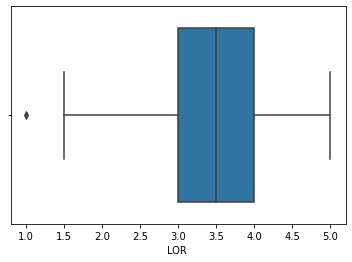

In [10]:
sns.boxplot(df1['LOR '])

In [11]:
def outlier(list):
    import pandas as pd
    df1=pd.Series(list)
    q1=df1.quantile(0.25)
    q3=df1.quantile(0.75)
    iqr=q3-q1
    left=q1-(1.5*iqr)
    right=q3+(1.5*iqr)
    ol=[]
    for i in list:
        if i<left or i>right:
            ol.append(i)
    print ('data range', left,'to', right)
    if len(ol)>0:
        print ('Outliers are ', ol)
    else:
        print ('There are no outliers in your data')
    return

In [12]:
outlier(df1['LOR '])

data range 1.5 to 5.5
Outliers are  [1.0]


In [27]:
df1['LOR '].replace(df1['LOR '] <1.4,0,inplace=True)

In [28]:
outlier(df1['LOR '])


data range 1.5 to 5.5
Outliers are  [0.0]


C:\Users\VARMA\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LOR '>

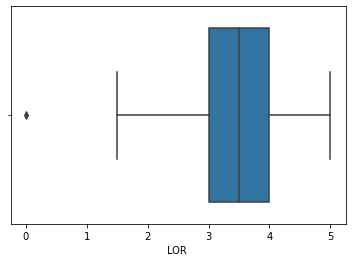

In [29]:
sns.boxplot(df1['LOR '])

In [30]:
corr=df1.corr()
corr

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.165489,-0.090951,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612317,0.556805,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657394,0.568697,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734556,0.659202,0.746479,0.447783,0.711250
SOP,-0.165489,0.612317,0.657394,0.734556,1.000000,0.730662,0.717789,0.443241,0.675142
LOR,-0.090951,0.556805,0.568697,0.659202,0.730662,1.000000,0.669989,0.396309,0.669733
CGPA,-0.045608,0.833060,0.828417,0.746479,0.717789,0.669989,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.443241,0.396309,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675142,0.669733,0.873289,0.553202,1.000000


Text(0.5, 1.0, 'Correlation Analysis')

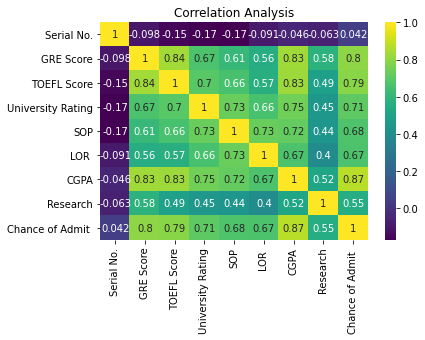

In [34]:
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Analysis')

In [35]:
x_data=df1.drop(['Serial No.', 'Chance of Admit '], axis=1)
y_data=df1['Chance of Admit ']
print (x_data.head())
print (y_data.head())

   GRE Score  TOEFL Score  University Rating   SOP  LOR   CGPA  Research
0        337          118                  4  4.50   4.5  9.65         1
1        324          107                  4  4.00   4.5  8.87         1
2        316          104                  3  3.08   3.5  8.00         1
3        322          110                  3  3.08   2.5  8.67         1
4        314          103                  2  2.00   3.0  8.21         0
0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64


In [38]:
x_data=np.array(x_data)
y_data=np.array(y_data)
x_data

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [39]:
#Data Splitting

In [40]:
x_train,x_test, y_train, y_test=train_test_split(x_data,y_data, test_size=0.20, random_state=25)
x_train

array([[298.  ,  92.  ,   1.  , ...,   2.  ,   7.88,   0.  ],
       [300.  , 105.  ,   1.  , ...,   2.  ,   7.8 ,   0.  ],
       [340.  , 112.  ,   4.  , ...,   4.5 ,   9.66,   1.  ],
       ...,
       [340.  , 120.  ,   4.  , ...,   4.  ,   9.92,   1.  ],
       [324.  , 111.  ,   3.  , ...,   2.  ,   8.8 ,   1.  ],
       [309.  , 105.  ,   5.  , ...,   3.5 ,   8.56,   0.  ]])

In [19]:
y_train

array([0.65, 0.79, 0.8 , 0.89, 0.59, 0.8 , 0.64, 0.79, 0.72, 0.72, 0.81,
       0.72, 0.94, 0.95, 0.57, 0.84, 0.69, 0.81, 0.78, 0.72, 0.64, 0.71,
       0.69, 0.77, 0.72, 0.84, 0.81, 0.74, 0.82, 0.78, 0.93, 0.73, 0.36,
       0.68, 0.76, 0.44, 0.87, 0.65, 0.61, 0.69, 0.84, 0.75, 0.92, 0.59,
       0.62, 0.38, 0.62, 0.73, 0.46, 0.96, 0.66, 0.69, 0.61, 0.57, 0.61,
       0.61, 0.57, 0.93, 0.53, 0.79, 0.79, 0.69, 0.96, 0.58, 0.76, 0.67,
       0.66, 0.72, 0.47, 0.78, 0.84, 0.62, 0.48, 0.94, 0.73, 0.89, 0.65,
       0.55, 0.66, 0.8 , 0.71, 0.81, 0.82, 0.43, 0.76, 0.58, 0.8 , 0.66,
       0.61, 0.65, 0.94, 0.92, 0.64, 0.67, 0.84, 0.92, 0.74, 0.44, 0.86,
       0.8 , 0.64, 0.63, 0.86, 0.94, 0.52, 0.73, 0.86, 0.76, 0.85, 0.82,
       0.7 , 0.67, 0.91, 0.58, 0.47, 0.81, 0.57, 0.81, 0.63, 0.68, 0.78,
       0.46, 0.94, 0.49, 0.78, 0.7 , 0.91, 0.79, 0.68, 0.73, 0.57, 0.85,
       0.88, 0.89, 0.52, 0.77, 0.64, 0.72, 0.75, 0.88, 0.7 , 0.68, 0.76,
       0.74, 0.42, 0.79, 0.64, 0.47, 0.71, 0.56, 0.

In [ ]:
#Model Development

In [42]:
#1.step
from sklearn.linear_model import LinearRegression

In [43]:
#2.create a model object
model=LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
#3. Training
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
print ('intercept value for model', model.intercept_)
print ('slope value for model', model.coef_)


intercept value for model -1.1253347639022175
slope value for model [ 0.00131154  0.00306205  0.00597339 -0.00399207  0.02453245  0.1163633
  0.02923556]


In [21]:
y_pred=model.predict(x_test)
y_pred

array([0.93296709, 0.69696885, 0.7896926 , 0.54040444, 0.69240802,
       0.88867071, 0.99399964, 0.59284139, 0.70671111, 0.95639744,
       0.73511142, 0.58479604, 0.49722657, 0.89558052, 0.77620306,
       0.78206782, 0.50853762, 0.9116358 , 0.60320534, 0.59324832,
       0.88473679, 0.90596477, 0.82706706, 0.82547897, 0.72140045,
       0.86446295, 0.62077561, 0.71210843, 0.61210403, 0.68092838,
       0.87689331, 0.71712278, 0.41516527, 0.54006011, 0.67595244,
       0.58889685, 0.78553977, 0.79981317, 0.81715868, 0.72623117,
       0.71101471, 0.61843768, 0.87145475, 0.58799022, 0.8275137 ,
       0.68942385, 0.69077082, 0.47510728, 0.80804216, 0.83111675,
       0.52838407, 0.77536751, 0.84755908, 0.72980444, 0.79315251,
       0.70979385, 0.77267127, 0.93353126, 0.88223183, 0.58588264,
       0.95183517, 0.65560873, 0.89710436, 0.71186104, 0.68068203,
       0.81589953, 0.63295412, 0.69928521, 0.67027468, 0.84411308,
       0.65080666, 0.88097094, 0.72764034, 0.94192833, 0.63727

In [22]:
df2=pd.DataFrame({'actual value':y_test, 'predicted value': y_pred})
df2.head() 

,actual value,predicted value
0,0.94,0.932967
1,0.67,0.696969
2,0.81,0.789693
3,0.38,0.540404
4,0.70,0.692408


In [48]:
model.score(x_test, y_test)*100

82.90377496162239

In [ ]:
#Real Time predictions

In [53]:
GRE_score = int(input('Enter Your GRE Score:'))
TOEFL_score = int(input('Enter Your Toefl Score:'))
university_rating = float(input('Enter Your university rating:'))
SOP = float(input('Enter Your SOP Score:'))
LOR = float(input('Enter Your LOR Score:'))
CGPA = float(input('Enter Your CGPA Score:'))
Research = int(input('do you have research in ur education :'))
prediction = model.predict([[GRE_score, TOEFL_score, university_rating, 
                            SOP, LOR, CGPA, Research]])
print ('Chances of getting application for your profile is', prediction*100)


Enter Your GRE Score:313
Enter Your Toefl Score:103
Enter Your university rating:3
Enter Your SOP Score:4
Enter Your LOR Score:4
Enter Your CGPA Score:8.75
do you have research in ur education :0
Chances of getting application for your profile is [71.88297914]


In [52]:
df1[220:221]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
220,221,313,103,3,4.0,4.0,8.75,0,0.76
